In [32]:
#import libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [33]:
df=pd.read_csv('spotify_data.csv')

## Data Exploration

In [34]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


**Shape of Dataset**

In [35]:
df.shape
print('Number of Rows in Dataset before dropping',df.shape[0])
print('Number of columns in dataset  ',df.shape[1])

Number of Rows in Dataset before dropping 1159764
Number of columns in dataset   20


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159764 non-null  object 
 2   track_name        1159764 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [37]:
df.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,6.590613e+05,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,4.285492e+05,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.899408e+05,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,5.798815e+05,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,1.031689e+06,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.473395e+06,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


###**Data Cleaning**

**Dropping a unnesscary column from the dataset**

In [38]:
#after dropping the col the dataset
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [39]:
# Convert the 'duration_ms' column from milliseconds to minutes
df['duration_minutes'] = df['duration_ms'] / 60000

# Drop the original 'duration_ms' column if needed
# df.drop('duration_ms', axis=1, inplace=True)

# Display the DataFrame with the 'duration_minutes' column
print(df[['duration_ms', 'duration_minutes']])


         duration_ms  duration_minutes
0             240166          4.002767
1             216387          3.606450
2             158960          2.649333
3             304293          5.071550
4             244320          4.072000
...              ...               ...
1159759       344013          5.733550
1159760       285067          4.751117
1159761       214253          3.570883
1159762       239133          3.985550
1159763       212227          3.537117

[1159764 rows x 2 columns]


In [40]:
# unnamed is an un-necessary column so drop it
df.drop(["Unnamed: 0",'track_name','track_id','duration_ms'], axis=1 , inplace= True )

In [41]:
df.head()

,artist_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_minutes
0,Jason Mraz,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,3,4.002767
1,Jason Mraz,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,3.606450
2,Joshua Hyslop,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,4,2.649333
3,Boyce Avenue,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,4,5.071550
4,Andrew Belle,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,4,4.072000


**Handling Missing Value**


In [42]:
#checking for the null values
df.isnull().sum()/len(df)

artist_name         0.0
popularity          0.0
year                0.0
genre               0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
time_signature      0.0
duration_minutes    0.0
dtype: float64

In [43]:
# remove Nulls
df=df.dropna()

## **Data Visualization**

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159764 non-null  object 
 1   popularity        1159764 non-null  int64  
 2   year              1159764 non-null  int64  
 3   genre             1159764 non-null  object 
 4   danceability      1159764 non-null  float64
 5   energy            1159764 non-null  float64
 6   key               1159764 non-null  int64  
 7   loudness          1159764 non-null  float64
 8   mode              1159764 non-null  int64  
 9   speechiness       1159764 non-null  float64
 10  acousticness      1159764 non-null  float64
 11  instrumentalness  1159764 non-null  float64
 12  liveness          1159764 non-null  float64
 13  valence           1159764 non-null  float64
 14  tempo             1159764 non-null  float64
 15  time_signature    1159764 non-null  int64  
 16  

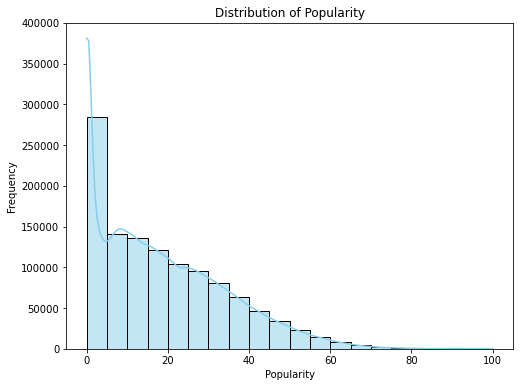

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['popularity'], bins=20, kde=True, color='skyblue')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.show()


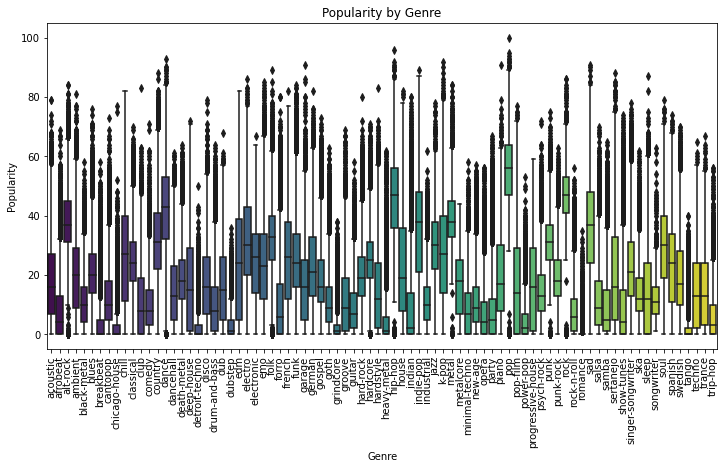

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='genre', y='popularity', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Popularity by Genre')
plt.show()


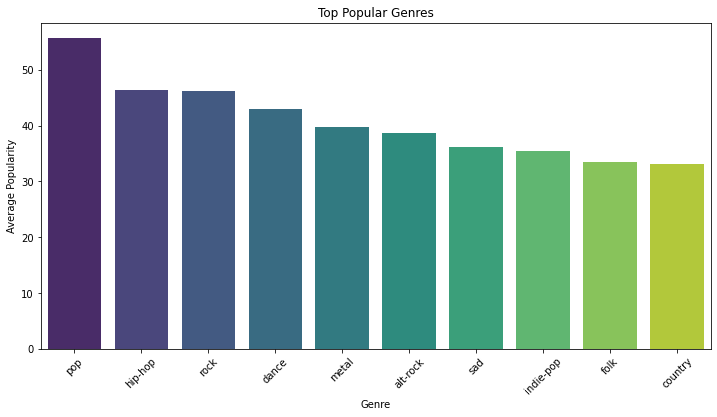

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average popularity for each genre
genre_popularity = df.groupby('genre')['popularity'].mean().reset_index()

# Sort the genres by popularity in descending order
top_genres = genre_popularity.sort_values(by='popularity', ascending=False).head(10)

# Create a bar plot for the top popular genres
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres, x='genre', y='popularity', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.title('Top Popular Genres')
plt.show()


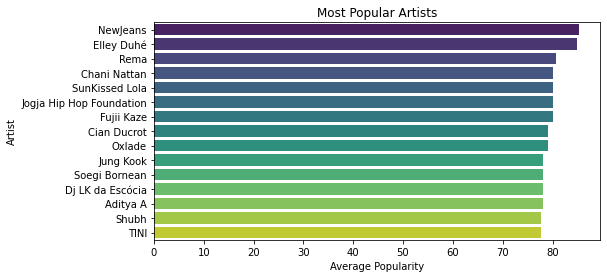

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average popularity for each artist
artist_popularity = df.groupby('artist_name')['popularity'].mean().reset_index()

# Sort the artists by popularity in descending order
top_artists = artist_popularity.sort_values(by='popularity', ascending=False).head(15)  # You can adjust the number of top artists as needed

# Create a bar plot for the top popular artists
plt.figure(figsize=(8, 4))
sns.barplot(data=top_artists, x='popularity', y='artist_name', palette='viridis')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.title('Most Popular Artists')
plt.show()


In [49]:
df['artist_name'].value_counts()[:500]

Traditional              4058
Grateful Dead            2320
Johann Sebastian Bach    2125
Giacomo Meyerbeer        1345
Elvis Presley            1242
                         ... 
Jim Chappell              188
Puscifer                  187
Black Sun Empire          187
Toneshifterz              187
Zeca Pagodinho            187
Name: artist_name, Length: 500, dtype: int64

In [50]:
df['artist_name'].value_counts()

Traditional              4058
Grateful Dead            2320
Johann Sebastian Bach    2125
Giacomo Meyerbeer        1345
Elvis Presley            1242
                         ... 
Gaia Consort                1
Dzej Ramadanovski           1
Goca Trzan                  1
Robbie O'Connell            1
Sleep Therapist             1
Name: artist_name, Length: 64159, dtype: int64

**Convert Artist with less accurance into other categories**

In [51]:
#

# Get the value counts for the "artist_name" column
artist_counts = df['artist_name'].value_counts()

# Filter the counts to include only values with count less than 20
artist_counts_less_than_20 = artist_counts[artist_counts < 50]

# Display the value counts for artist names with count less than 20
print(artist_counts_less_than_20)


The Carburetors         49
Agni                    49
Kavita Krishnamurthy    49
Lit                     49
Kash Trivedi            49
                        ..
Gaia Consort             1
Dzej Ramadanovski        1
Goca Trzan               1
Robbie O'Connell         1
Sleep Therapist          1
Name: artist_name, Length: 58294, dtype: int64


In [52]:
# Convert artist with less than 50 appearance to other category
# Assuming your DataFrame is named df

# Get the value counts for the "artist_name" column
artist_counts = df['artist_name'].value_counts()

# Identify artists with counts less than 50
artists_less_than_50 = artist_counts[artist_counts < 50].index.tolist()

# Label the artists as "Others" in the DataFrame
df.loc[df['artist_name'].isin(artists_less_than_50), 'artist_name'] = 'Others'

# Get the updated value counts
updated_artist_counts = df['artist_name'].value_counts()

# Display the updated value counts
print(updated_artist_counts)


Others                   549622
Traditional                4058
Grateful Dead              2320
Johann Sebastian Bach      2125
Giacomo Meyerbeer          1345
                          ...  
Area 11                      50
Taio Cruz                    50
Sons Of Maria                50
Savoy                        50
CalledOut Music              50
Name: artist_name, Length: 5866, dtype: int64


### Correlations

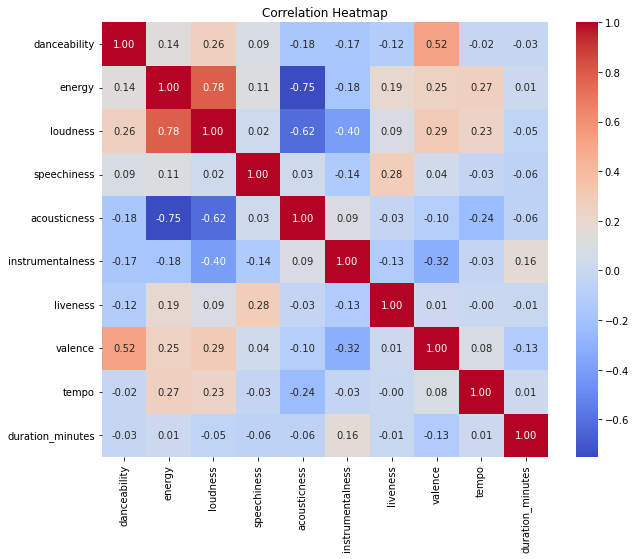

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt


# Select only the numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [54]:
## drop High correlated input columns
import pandas as pd

# Assuming your DataFrame is named df

# Select only the numerical columns for correlation analysis (excluding 'popularity')
numerical_columns = df.select_dtypes(include=['float','int']).drop(columns=['popularity'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a mask for highly correlated features (excluding the diagonal)
high_corr_mask = (correlation_matrix.abs() >= 0.5) & (correlation_matrix < 1)

# Find pairs of highly correlated features
high_corr_pairs = [(col1, col2) for col1 in high_corr_mask.columns for col2 in high_corr_mask.columns if high_corr_mask.loc[col1, col2]]

# Remove one of each highly correlated pair
columns_to_drop = set()
for col1, col2 in high_corr_pairs:
    if col1 not in columns_to_drop and col2 not in columns_to_drop:
        # Decide which feature to drop (e.g., based on domain knowledge or other criteria)
        # Here, we drop the one with the longer column name
        if len(col1) > len(col2):
            columns_to_drop.add(col1)
        else:
            columns_to_drop.add(col2)

# Drop the highly correlated features from the DataFrame
df_filtered = df.drop(columns=list(columns_to_drop))

# Display the DataFrame with highly correlated features removed
df_filtered.head()


,artist_name,popularity,year,genre,energy,key,mode,speechiness,instrumentalness,liveness,valence,tempo,time_signature,duration_minutes
0,Jason Mraz,68,2012,acoustic,0.303,4,1,0.0429,0.000000,0.1150,0.139,133.406,3,4.002767
1,Jason Mraz,50,2012,acoustic,0.454,3,1,0.0258,0.000014,0.0974,0.515,140.182,4,3.606450
2,Joshua Hyslop,57,2012,acoustic,0.234,3,1,0.0323,0.000050,0.0895,0.145,139.832,4,2.649333
3,Boyce Avenue,58,2012,acoustic,0.251,10,1,0.0363,0.000000,0.0797,0.508,204.961,4,5.071550
4,Andrew Belle,54,2012,acoustic,0.791,6,0,0.0302,0.019300,0.1100,0.217,171.864,4,4.072000


## **Preprocessing**

### Label Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder


# convert artist name to one hot encoding
categorical_columns = ['artist_name']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    df_filtered[column] = label_encoder.fit_transform(df_filtered[column])

# Display the DataFrame with encoded categorical columns
df_filtered


,artist_name,popularity,year,genre,energy,key,mode,speechiness,instrumentalness,liveness,valence,tempo,time_signature,duration_minutes
0,2441,68,2012,acoustic,0.303,4,1,0.0429,0.000000,0.1150,0.1390,133.406,3,4.002767
1,2441,50,2012,acoustic,0.454,3,1,0.0258,0.000014,0.0974,0.5150,140.182,4,3.606450
2,2624,57,2012,acoustic,0.234,3,1,0.0323,0.000050,0.0895,0.1450,139.832,4,2.649333
3,731,58,2012,acoustic,0.251,10,1,0.0363,0.000000,0.0797,0.5080,204.961,4,5.071550
4,272,54,2012,acoustic,0.791,6,0,0.0302,0.019300,0.1100,0.2170,171.864,4,4.072000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,3694,4,2011,trip-hop,0.742,10,0,0.0736,0.000141,0.1590,0.5220,107.951,3,5.733550
1159760,3694,3,2011,trip-hop,0.675,7,0,0.0326,0.000129,0.1300,0.2640,119.897,4,4.751117
1159761,245,2,2011,trip-hop,0.440,5,1,0.0274,0.003130,0.0936,0.0351,100.076,4,3.570883
1159762,3857,0,2011,trip-hop,0.405,0,1,0.0276,0.000063,0.1250,0.2020,133.885,3,3.985550


In [56]:
import pandas as pd
# grnre for one hot encoding
categorical_columns = ['genre']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_filtered, columns=categorical_columns)

# Display the first few rows of the encoded DataFrame
df_encoded.head()


,artist_name,popularity,year,energy,key,mode,speechiness,instrumentalness,liveness,valence,...,genre_ska,genre_sleep,genre_songwriter,genre_soul,genre_spanish,genre_swedish,genre_tango,genre_techno,genre_trance,genre_trip-hop
0,2441,68,2012,0.303,4,1,0.0429,0.000000,0.1150,0.139,...,0,0,0,0,0,0,0,0,0,0
1,2441,50,2012,0.454,3,1,0.0258,0.000014,0.0974,0.515,...,0,0,0,0,0,0,0,0,0,0
2,2624,57,2012,0.234,3,1,0.0323,0.000050,0.0895,0.145,...,0,0,0,0,0,0,0,0,0,0
3,731,58,2012,0.251,10,1,0.0363,0.000000,0.0797,0.508,...,0,0,0,0,0,0,0,0,0,0
4,272,54,2012,0.791,6,0,0.0302,0.019300,0.1100,0.217,...,0,0,0,0,0,0,0,0,0,0


#**Machine learning Models Implementaion**

1. Classification and Regression



**DROPING THE TARGETED COLUMN**

## For Regression

In [57]:
#Drop the target column for regression
X_reg=df_encoded.drop(columns=['popularity'])
y_reg=df_encoded['popularity']

In [58]:
# Create a custom function to map popularity to categories
def map_popularity_to_category(popularity):
    if popularity > 55:
        return 'High'
    elif 40 <= popularity <= 55:
        return 'Moderate'
    else:
        return 'Low'

# Apply the mapping function to create the 'popularity_category' column
df_encoded['popularity_category'] = df_encoded['popularity'].apply(map_popularity_to_category)

# Display the DataFrame with the new 'popularity_category' column
print(df_encoded[['popularity', 'popularity_category']].head())


   popularity popularity_category
0          68                High
1          50            Moderate
2          57                High
3          58                High
4          54            Moderate


In [59]:
df_encoded[['popularity', 'popularity_category']]

,popularity,popularity_category
0,68,High
1,50,Moderate
2,57,High
3,58,High
4,54,Moderate
...,...,...
1159759,4,Low
1159760,3,Low
1159761,2,Low
1159762,0,Low


### For Classification

In [60]:
#Drop the target column for regression
X_cls=df_encoded.drop(columns=['popularity','popularity_category'])
y_cls=df_encoded['popularity_category']

**Sampling**

In [61]:
# Balancing the dataset
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
X_cls, y_cls = oversample.fit_resample(X_cls, y_cls)

## Apply Classification Models

**DATA SPLITTNG**

Split the data into two datas

1.   Train data
2.   Test data



In [62]:
# Spliting the  the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.33, random_state=42)

In [63]:
X_train

,artist_name,year,energy,key,mode,speechiness,instrumentalness,liveness,valence,tempo,...,genre_ska,genre_sleep,genre_songwriter,genre_soul,genre_spanish,genre_swedish,genre_tango,genre_techno,genre_trance,genre_trip-hop
2237006,2465,2020,0.465,4,0,0.0276,0.000000,0.1080,0.2910,92.929,...,0,0,0,0,0,0,0,0,0,0
1306144,3857,2022,0.570,0,0,0.1410,0.000000,0.0913,0.7600,136.048,...,0,0,0,0,0,0,0,0,0,0
1654440,3857,2022,0.763,0,1,0.2610,0.000003,0.3140,0.5250,129.994,...,0,0,0,0,0,0,0,0,0,0
2009121,3857,2011,0.241,10,1,0.0349,0.004130,0.1090,0.2030,122.115,...,0,0,0,0,0,0,0,0,0,0
2709395,3857,2021,0.724,0,0,0.0656,0.000069,0.1220,0.4880,120.226,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692743,3857,2015,0.301,0,0,0.0441,0.421000,0.0335,0.5540,140.106,...,0,0,0,0,0,0,0,0,0,0
2356330,709,2017,0.844,9,0,0.0566,0.000019,0.1190,0.6060,153.014,...,0,0,0,0,0,0,0,0,0,0
2229084,3857,2002,0.989,5,0,0.2470,0.028500,0.5700,0.0616,187.859,...,0,0,0,0,0,0,0,0,0,0
2768307,1775,2018,0.482,8,1,0.0247,0.000001,0.1080,0.2430,92.567,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y_train.value_counts()

High        688114
Low         687719
Moderate    687206
Name: popularity_category, dtype: int64

#**Mahine Learning Models**

In [65]:
#From Sk learns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

**logistic regression**

/Users/spoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix: 
 [[179599  74803  83872]
 [108787 166106  63776]
 [142897 102197  94088]]

Accuracy : 
 43.281387624554064

 Report : 
               precision    recall  f1-score   support

        High       0.42      0.53      0.47    338274
         Low       0.48      0.49      0.49    338669
    Moderate       0.39      0.28      0.32    339182

    accuracy                           0.43   1016125
   macro avg       0.43      0.43      0.43   1016125
weighted avg       0.43      0.43      0.43   1016125


 The  LR Heatmap of Confusion matrix is



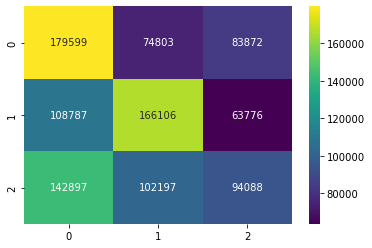

In [66]:
#logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_lr))
print ("\nAccuracy : \n", accuracy_score(y_test, y_pred_lr)*100)
print("\n Report : \n",classification_report(y_test, y_pred_lr))

print('\n The  LR Heatmap of Confusion matrix is\n')
sns.heatmap(confusion_matrix(y_test, y_pred_lr),annot=True, fmt='g',cmap='viridis')
plt.show()


**DECISION TREE CLASSIFIER (DTC)**

Confusion Matrix: 
 [[338274   3850    286]
 [     0 307751    194]
 [     0  27068 338702]]

 Accuracy : 
 96.91002583343584

 Report : 
               precision    recall  f1-score   support

        High       1.00      0.99      0.99    342410
         Low       0.91      1.00      0.95    307945
    Moderate       1.00      0.93      0.96    365770

    accuracy                           0.97   1016125
   macro avg       0.97      0.97      0.97   1016125
weighted avg       0.97      0.97      0.97   1016125


 The DTC heat map of Confusion matrix is  



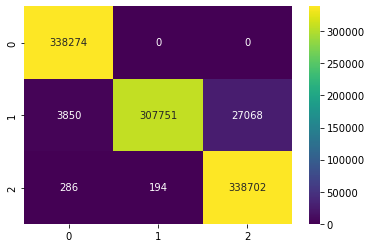

In [67]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_pred_dtc, y_test))
print ("\n Accuracy : \n", accuracy_score(y_pred_dtc, y_test)*100)
print("\n Report : \n",classification_report(y_pred_dtc, y_test))
print('\n The DTC heat map of Confusion matrix is  \n')
sns.heatmap(confusion_matrix(y_test, y_pred_dtc),annot=True, fmt='g',cmap='viridis')

plt.show()


**RANDOM FOREST CLASSIFIER (RFC)**

Confusion Matrix: 
 [[338274      0      0]
 [   338 325542  12789]
 [   234    192 338756]]

 Accuracy : 
 98.66620740558494

 Report : 
               precision    recall  f1-score   support

        High       1.00      1.00      1.00    338274
         Low       1.00      0.96      0.98    338669
    Moderate       0.96      1.00      0.98    339182

    accuracy                           0.99   1016125
   macro avg       0.99      0.99      0.99   1016125
weighted avg       0.99      0.99      0.99   1016125


 The  RFc Heatmap of Confusion matrix is 



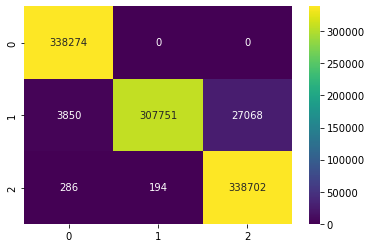

In [68]:
#RFC
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_rfc))
print ("\n Accuracy : \n", accuracy_score(y_test, y_pred_rfc)*100)
print("\n Report : \n",classification_report(y_test, y_pred_rfc))
print('\n The  RFc Heatmap of Confusion matrix is \n')
sns.heatmap(confusion_matrix(y_test, y_pred_dtc),annot=True, fmt='g',cmap='viridis')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test contains the actual popularity values, and y_pred_rfc contains the predicted popularity values

# Plotting the actual vs. predicted popularity
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rfc, alpha=0.5)
plt.title('Actual vs. Predicted Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.grid(True)
plt.show()


## Regression Modeling

In [69]:
#Drop the target column for regression
X_reg=df_encoded.drop(columns=['popularity','popularity_category'])
y_reg=df_encoded['popularity'].astype(float)

In [70]:
# Spliting the  the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.33, random_state=42)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model (for regression, typically using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate additional regression metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


Mean Squared Error: 114.19907248172926
Mean Squared Error (MSE): 114.20
Mean Absolute Error (MAE): 8.19
Root Mean Squared Error (RMSE): 10.69
R-squared (R2) Score: 0.55


In [72]:
## random forest regression

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
from sklearn.ensemble import RandomForestRegressor


# Initialize the Random Forest Regressor model
regressor = RandomForestRegressor(random_state=42)

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model (for regression, typically using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate additional regression metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


Mean Squared Error: 76.63935130884003
Mean Squared Error (MSE): 76.64
Mean Absolute Error (MAE): 6.48
Root Mean Squared Error (RMSE): 8.75
R-squared (R2) Score: 0.70


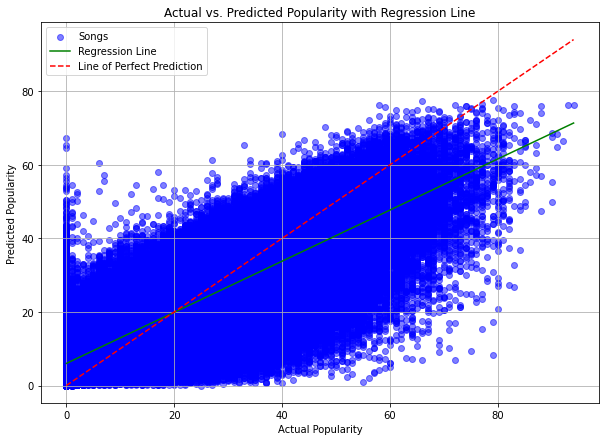

In [76]:

from numpy.polynomial.polynomial import Polynomial



# Visualizing Predicted vs. Actual Popularity
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, color='blue', label='Songs', alpha=0.5)

# Fit a polynomial of degree 1 (i.e., a line) to the data
p = Polynomial.fit(y_test, y_pred, 1)

# Plot the regression line
x = np.linspace(min(y_test), max(y_test), 100)
y = p(x)
plt.plot(x, y, color='green', label='Regression Line')

# Plot the line of perfect prediction
plt.plot([min(y_test), max(y_test)], 
         [min(y_test), max(y_test)], 
         color='red', linestyle='--', label='Line of Perfect Prediction')  # Diagonal line for perfect predictions

# Labeling the plot
plt.title("Actual vs. Predicted Popularity with Regression Line")
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.legend()
plt.grid(True)
plt.show()
